<a href="https://colab.research.google.com/github/badriadhikari/AI-2020spring/blob/master/notebooks/Univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Linear Regression  
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing `Blood Pressure`?


In [7]:
from google.colab import files
files.upload()

Saving pima-diabetes.csv to pima-diabetes.csv


{'pima-diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.2

In [8]:
import pandas as pd
data = pd.read_csv('pima-diabetes.csv', delimiter=',')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
dataset = np.genfromtxt('pima-diabetes.csv', delimiter=",", skip_header = True, usecols=(2, 7)) 

In [23]:
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(768, 2)

[[72. 50.]
 [66. 31.]
 [64. 32.]
 [66. 21.]
 [40. 33.]]


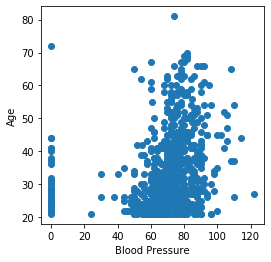

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 1, activation='linear'))

In [30]:
model.compile(loss='mse', optimizer = 'rmsprop', metrics=['mse'])
model.fit(dataset[:, 0], dataset[:, 1], epochs = 256, verbose = 0)

In [31]:
print('Model weights - w0(slope m), bias):')
w0 = model.layers[0].get_weights()[0][0]
b0 = model.layers[0].get_weights()[1]
print(w0)
print(b0)

Model weights - w0(slope m), bias):
[0.39733028]
[4.265284]


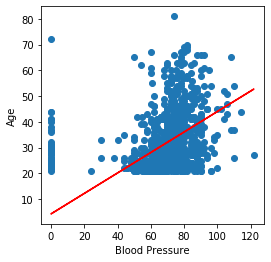

In [32]:
plt.figure(figsize=(4,4))
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.plot(dataset[:, 0], b0 + w0 * dataset[:, 0], '-', color = 'red')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()